# Linear regression with one feature

### ***Hypothesis function*** 
#### $h_{\theta}(x) = \theta_{0} + \theta_{1}x$

### ***Cost function***
#### $J(\theta_{0}, \theta_{1}) =\frac1{2m} \sum_{i=1}^{m}\limits (h_{\theta}(x_{i}) - y_{i})^2$

### ***Gradient descent*** 
#### $\theta_{i} = \theta_{i} - \alpha \frac{\partial}{\partial \theta_{i}}J( \theta_{0}, \theta_{1})$

### ***Gradient descent for linear regression*** 
#### $\theta_{0} = \theta_{0} - \alpha \frac1m \sum_{i=1}^{m}\limits (h_{\theta}(x_{i}) - y_{i})$
#### $\theta_{1} = \theta_{1} - \alpha \frac1m \sum_{i=1}^{m}\limits ((h_{\theta}(x_{i}) - y_{i})x_{i})$

In [1]:
import numpy as np
import pylab as plt
import matplotlib
import matplotlib.cm as cm

In [196]:
n = 8
sizeInp = np.zeros(n, dtype=int)
priceInp = np.zeros(n, dtype=int)
sizeInp[0] = 950
priceInp[0] = 1000
sizeInp[1] = 1535
priceInp[1] = 1300
sizeInp[2] = 1605
priceInp[2] = 1500
sizeInp[3] = 1905
priceInp[3] = 1900
sizeInp[4] = 2057
priceInp[4] = 2000
sizeInp[5] = 2227
priceInp[5] = 2100
sizeInp[6] = 3150
priceInp[6] = 2899
sizeInp[7] = 3620
priceInp[7] = 3000

In [197]:
print(sizeInp)
print(priceInp)

[ 950 1535 1605 1905 2057 2227 3150 3620]
[1000 1300 1500 1900 2000 2100 2899 3000]


In [6]:
def featureNormalize(data):
    maxV = np.amax(data)
    minV = np.amin(data)
    deviation = maxV - minV
    sz = len(data)
    mean = np.sum(data)/sz
    
    normData = np.zeros(n, dtype = float)
    for i in range(n):
        normData[i] = (data[i] - mean)/deviation
    return normData

In [199]:
price = priceInp
size = featureNormalize(sizeInp)
print(size)
print (price)

[-0.44236891 -0.22326779 -0.19705056 -0.08469101 -0.02776217  0.03590824
  0.38160112  0.55763109]
[1000 1300 1500 1900 2000 2100 2899 3000]


In [200]:
def hypothesis(a0, a1, x):
    return a0 + a1*x

def update_hyp(a0, a1, hypPrice, size, n):
    for i in range(n):
        hypPrice[i] = hypothesis(a0, a1, size[i])

def cost_function(hypPrice, price, n):
    return np.sum((hypPrice - price)**2)/(2*n)

def gradient_descent(size, price):
    a0 = 0
    a1 = 0
    eps = 10**(-10)
    alpha = 0.3

    hypPrice = np.zeros(n)
    update_hyp(a0, a1, hypPrice, price, n)

    prevVal = cost_function(hypPrice, price, n)
    curVal = prevVal
    flag = False
    iteration = 0
    costFunc = np.zeros(10000)
    while(iteration < 10000 and (not flag or abs(curVal - prevVal) > eps)):
        flag = True
        prevVal = curVal
        
        temp0 = a0 - alpha * (np.sum(hypPrice - price))/n 
        temp1 = a1 - alpha * (np.sum((hypPrice - price)*size))/n
        a0 = temp0
        a1 = temp1
        
        update_hyp(a0, a1, hypPrice, size, n)
        curVal = cost_function(hypPrice, price, n)
        costFunc[iteration] = curVal
        iteration = iteration + 1
    return a0, a1, costFunc, iteration

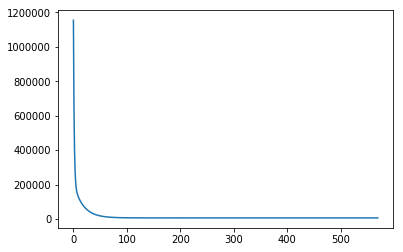

In [201]:
a0, a1, costFunc, iteration = gradient_descent(size, price)
costFunc = costFunc[:iteration]
plt.plot(costFunc)

In [202]:
print(iteration)
intHypPrice = np.zeros(n, dtype=int)
for i in range(n):
    intHypPrice[i] = int(hypPrice[i])
print(intHypPrice)
print(price)
print(a0, a1)

570
[ 960 1545 1615 1915 2067 2236 3159 3629]
[1000 1300 1500 1900 2000 2100 2899 3000]
1962.3749999999998 2146.0830545929703


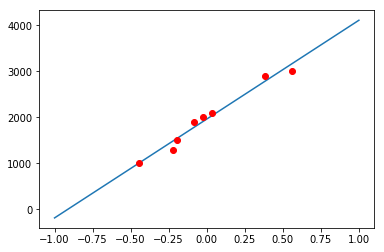

In [205]:
x = np.linspace(-1, 1)
y = a0 + a1*x
plt.plot(x, y)
plt.plot(size, price, 'ro')

In [204]:
def finalPrice(x):
    maxV = np.amax(sizeInp)
    minV = np.amin(sizeInp)
    deviation = maxV - minV
    sz = len(sizeInp)
    mean = np.sum(sizeInp)/sz
    newX = (x-mean)/deviation
    newPrice = a0 + a1*newX
    return newPrice

# Linear regression with multiple features

In [2]:
m = 8
featuresNum = 2
size = np.zeros(m, dtype=int)
roomsNum = np.zeros(m, dtype=int)
price = np.zeros(m, dtype=int)
size[0] = 950
roomsNum[0] = 1
price[0] = 1000
size[1] = 1535
roomsNum[1] = 1
price[1] = 1300
size[2] = 1605
roomsNum[2] = 1
price[2] = 1500
size[3] = 1905
roomsNum[3] = 2
price[3] = 1900
size[4] = 2057
roomsNum[4] = 2
price[4] = 2000
size[5] = 2227
roomsNum[5] = 3
price[5] = 2100
size[6] = 3150
roomsNum[6] = 2
price[6] = 2899
size[7] = 3620
roomsNum[7] = 3 
price[7] = 3000

In [12]:
x1 = size
x2 = roomsNum
y = price
originX = np.zeros([m, featuresNum + 1], dtype=int)
originX[:, 0]  = np.ones(m)
originX[:, 1] = x1
originX[:, 2] = x2
print(originX)

[[   1  950    1]
 [   1 1535    1]
 [   1 1605    1]
 [   1 1905    2]
 [   1 2057    2]
 [   1 2227    3]
 [   1 3150    2]
 [   1 3620    3]]


In [13]:
def mean_matrix(originX):
    meanMatrix = np.zeros(len(originX) - 1)
    for i in range(1, originX.shape[1]):
        meanMatrix[i-1] = np.sum(originX[:, i])/originX.shape[0]
    return meanMatrix

def deviation_matrix(originX):
    deviationMatrix = np.zeros(len(originX) - 1)
    for i in range(1, originX.shape[1]):
        deviationMatrix[i-1] = np.amax(originX[:, i]) - np.amin(originX[:, i])
    return deviationMatrix

def featureNormalize(data):
    maxV = np.amax(data)
    minV = np.amin(data)
    deviation = maxV - minV
    sz = len(data)
    mean = np.sum(data)/sz
    
    normData = np.zeros(sz, dtype = float)
    for i in range(sz):
        normData[i] = (data[i] - mean)/deviation
    return normData

x = np.ones([m, featuresNum + 1])
for i in range(1, x.shape[1]):
    x[:, i] = featureNormalize(originX[:, i])
    
print(x)

[[ 1.         -0.44236891 -0.4375    ]
 [ 1.         -0.22326779 -0.4375    ]
 [ 1.         -0.19705056 -0.4375    ]
 [ 1.         -0.08469101  0.0625    ]
 [ 1.         -0.02776217  0.0625    ]
 [ 1.          0.03590824  0.5625    ]
 [ 1.          0.38160112  0.0625    ]
 [ 1.          0.55763109  0.5625    ]]


In [24]:
def hypothesis(theta, x):
    return np.dot(theta.T, x)

def update_price(hypPrice, theta, x):
    for i in range(len(hypPrice)):
        hypPrice[i] = hypothesis(theta, x[i])
    return hypPrice
        
def cost_func(hypPrice, y):
    m = len(y)
    return np.sum((hypPrice - y)**2)/(2*m)

def gradient_descent(x, y):
    theta = np.zeros(x.shape[1])
    alpha = 0.5
    eps = 10**(-10)
    
    hypPrice = np.zeros(len(y))
    hypPrice = update_price(hypPrice, theta, x)
    
    prevVal = cost_func(hypPrice, y)
    curVal = prevVal
    flag = False
    iteration = 0
    costFunc = np.zeros(10000)
    
    while(iteration < 10000 and (not flag or abs(curVal - prevVal) > eps)):
        flag = True
        prevVal = curVal
        
        m = len(theta)
        temp = np.zeros(m)
        for i in range(m):
            temp[i] = theta[i] - alpha * np.sum((hypPrice - y)*x[:, i])/m
        theta = temp
        update_price(hypPrice, theta, x)
        curVal = cost_func(hypPrice, y)
        costFunc[iteration] = curVal
        iteration = iteration + 1
    return theta, costFunc, iteration

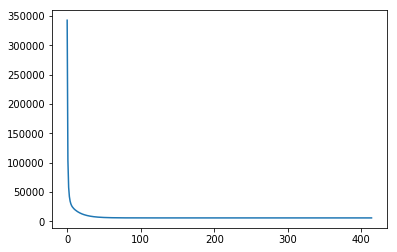

In [25]:
theta, costFunc, iteration = gradient_descent(x, y)
costFunc = costFunc[:iteration]
plt.plot(costFunc)

In [23]:
print(theta)

[1962.375      2016.05834892  133.96403111]


In [17]:
def predictY(newX, theta, originX):
    meanMatrix = mean_matrix(originX)
    deviationMatrix = deviation_matrix(originX)
    normalizedX = np.zeros(len(newX))
    for i in range(len(newX)):
        normalizedX[i] = (newX[i] - meanMatrix[i])/deviationMatrix[i]
    xExpand = np.ones(len(newX) + 1)
    xExpand[1:] = normalizedX
    return np.dot(theta.T, xExpand)

In [20]:
print(predictY([10000, 2], theta, originX))

7912.362411246616
